# Séance 5

## Objectifs de la séance

- Tracé des différents diagrammes fréquentiels
- Effet d’un correcteur proportionnel dans ces différents diagrammes => régulateur P
- Construction asymptotiques du diagramme de Bode par décomposition de la fonction de transfert en fonction simple
- Analyse de la stabilité/instabilité

In [1]:
from IPython.display import Image, display, Markdown

from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of HELMo Gramme

## Diagrammes fréquentiels

Représentez le système modélisé par un pôle simple
$
 H_{BO}(p)=\frac{1}{p+1}
$
dans les différents diagrammes pour visualiser l’effet d’un pôle : p=-1, $\tau$=1s et $\omega_n$=1rad/s

In [2]:
H_BO = ml.tf(1, [1, 1])

### Nyquist (*cf. p. 4-6*)

Afin de tracer le diagramme de Nyquist, il suffit d'entrer la ligne de code suivante:

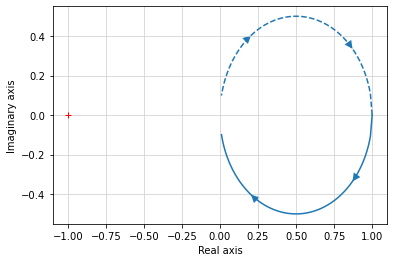

In [3]:
real, imag, freq = ml.nyquist(H_BO);

:::{admonition} Attention
:class: warning
Attention, le graphique est tracé aussi pour des $\omega_n<0$ (en trait discontinu) ce qui n’a aucun sens physiquement! Il ne faut donc tenir compte **que** du tracé en trait plein.
:::

On peut également demander à python d'afficher les fréquences sur le graphe:

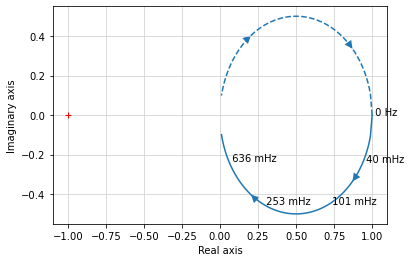

In [4]:
ml.nyquist(H_BO, label_freq=200);

### Bode (*cf. p. 4-7 à 4-12*)

Pour tracer le diagramme de Bode, on peut soit laisser python fixer automatiquement la plage de variation de la pulsation:

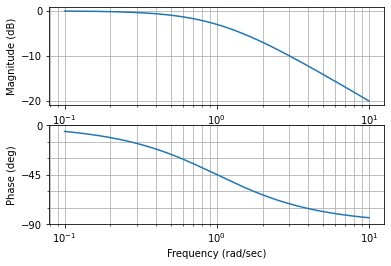

In [5]:
ml.bode(H_BO);

ou si on préfère imposer l’intervalle de variation de la pulsation, on peut faire cela ainsi:

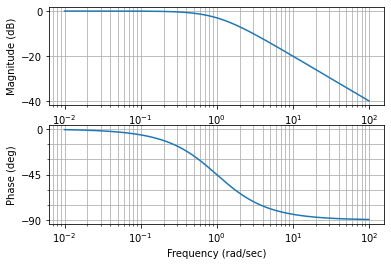

In [6]:
w = np.logspace(-2, 2, 10000) # Echelle logarithmique allant de 10^-2 à 10^2
ml.bode(H_BO, w);

La différence entre les 2 solutions est le nombre de points de calculs (= points d’affichage)

:::{admonition} À faire
:class: seealso
Comparez la courbe réelle à son tracé asymptotique (voir pages 4-11 et 12).
:::

### Nichols (*cf. p. 4-18*)

On peut soit utiliser la fonction `nichols` du package `python Control` et on obtient ceci:

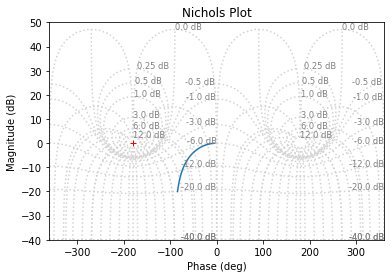

In [7]:
ml.nichols(H_BO)

Ou on utilise la fonction `nichols` revue dans le package `ReguLabFct` pour faciliter sa lecture dans le cadre du laboratoire de régulation:

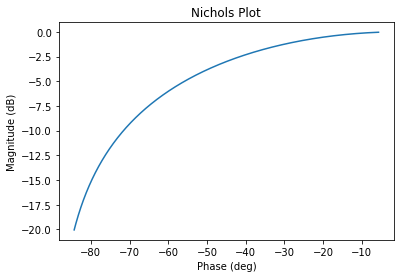

In [8]:
rlf.nichols(H_BO)

### Résumé sur l'effet d'un pôle (*cf. p. 4-16*)

Module: $\left\{
    \begin{array}{ll}
        \omega<\omega_c : rien\\
        \omega>\omega_c : -20dB/décade
    \end{array}
\right.$

Phase: $\left\{
    \begin{array}{ll}
        \omega<\omega_c : rien\\
        \omega>\omega_c : -90°
    \end{array}
\right.$

### Effet d’une modification du gain statique sur les différents diagrammes

Observez l’effet du gain statique : K=2, 5, 10 …

Tracez les 3 graphiques:

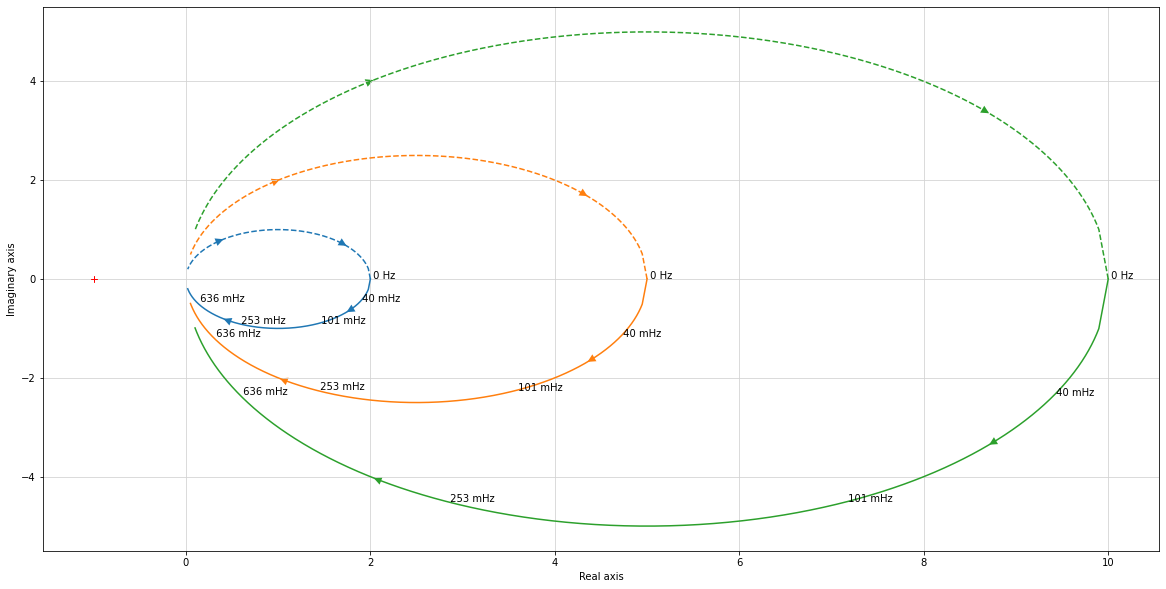

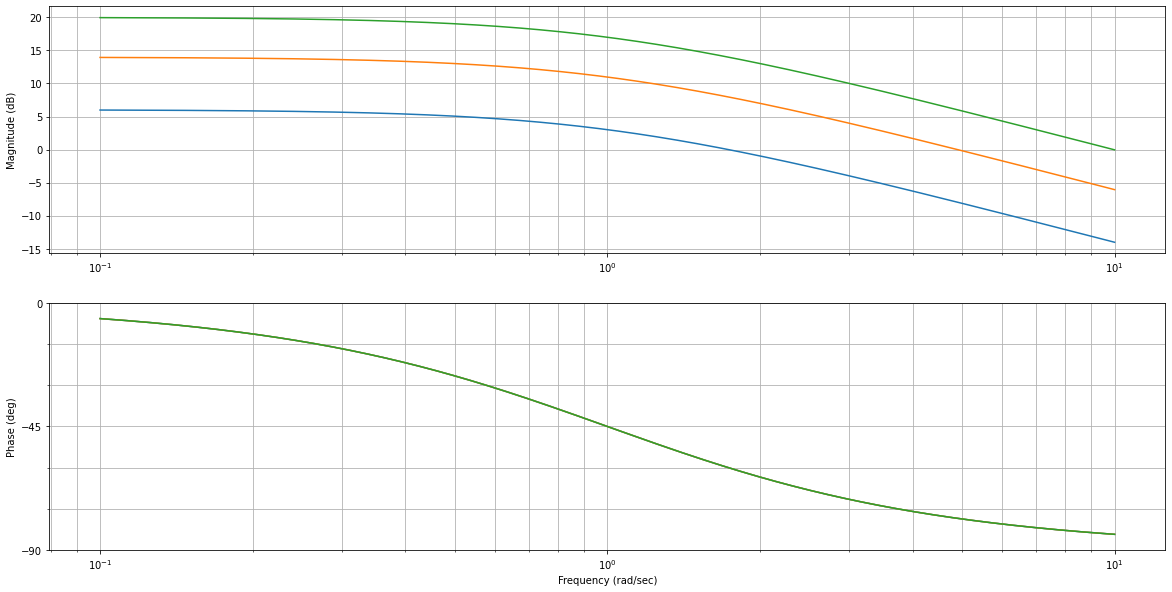

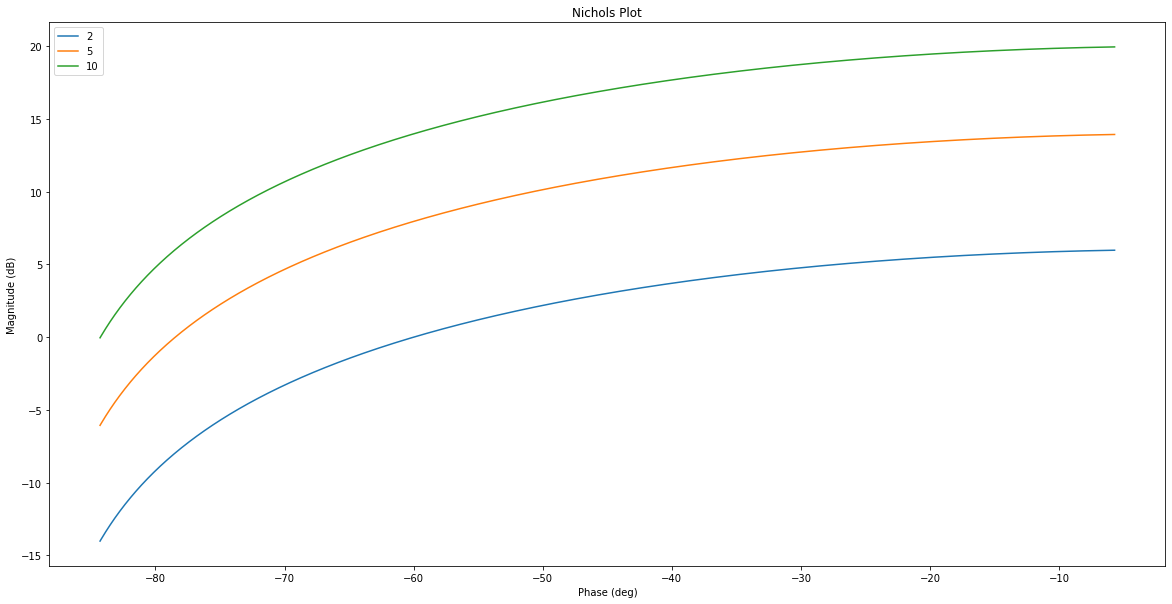

In [9]:
K_list = [2, 5, 10]

for K in K_list:

    fig_nyquist = plt.figure("Nyquist",figsize=(20,10))
    ml.nyquist(K*H_BO, label_freq=200)
    
    fig_bode = plt.figure("Bode",figsize=(20,10))
    ml.bode(K*H_BO)
    
    fig_nichols = plt.figure("Nichols",figsize=(20,10))
    rlf.nichols(K*H_BO, NameOfFigure="Nichols", labels=[str(K)])

Concluez sur l’effet d’une augmentation de constante (cf. augmentation du gain proportionnel en BO) :

Effet dans:

- Nyquist : ...
- Bode : ...
- Nichols : ...

:::{toggle}
- Nyquist : Étalement suivant l'axe des réels
- Bode: Translation verticale du gain de 20log(K) et phase indépendante de K
- Nichols: Translation verticale de la courbe de 20log(K)

Car 
$
\begin{alignat*}{2}
K*H\Rightarrow
\left\{ \begin{aligned}
    \begin{array}{ll}
        M_{dB} = 20*\log(K*H) = 20\log(H)+20\log(K) = 20\log(H) + translation\\
        \varphi = \varphi(K)+\varphi(H)=0^{\circ}+\varphi(H)
    \end{array}
\end{aligned}\right.
\end{alignat*}\
$
:::

:::{danger}
Attention que l'analyse fréquentielle s'applique sur le système en **boucle ouverte** contrairement à l'analyse temporelle ($\rightarrow$ réponse indicielle) qui s'applique, elle, sur le système en **boucle fermée**!
:::

## Régulateur P

Soit la fonction de l'exercice 1 (cf. p. 7-3):

$$
G(p) = \frac{1}{(1+0,5p)*(1+0,25p)}
$$

Déterminez, à l'aide du diagramme de Nichols, le correcteur P qui permette de translater la courbe pour une marge de phase de 45° : KP= ...

:::{admonition} Astuce
:class: tip
Une fonction fournie dans le package `ReguLabFct` permet d'obtenir le gain et la fréquence d'un système donnée à une phase donnée. Il s'agit de la fonction `getValues` (cf. documentation du package `ReguLabFct`).
:::

Gain à -135° = -17.56544890480597 dB
Fréquence à -135° = 7.1233661553256065 rad/sec
Kp = 7.5556606703682965


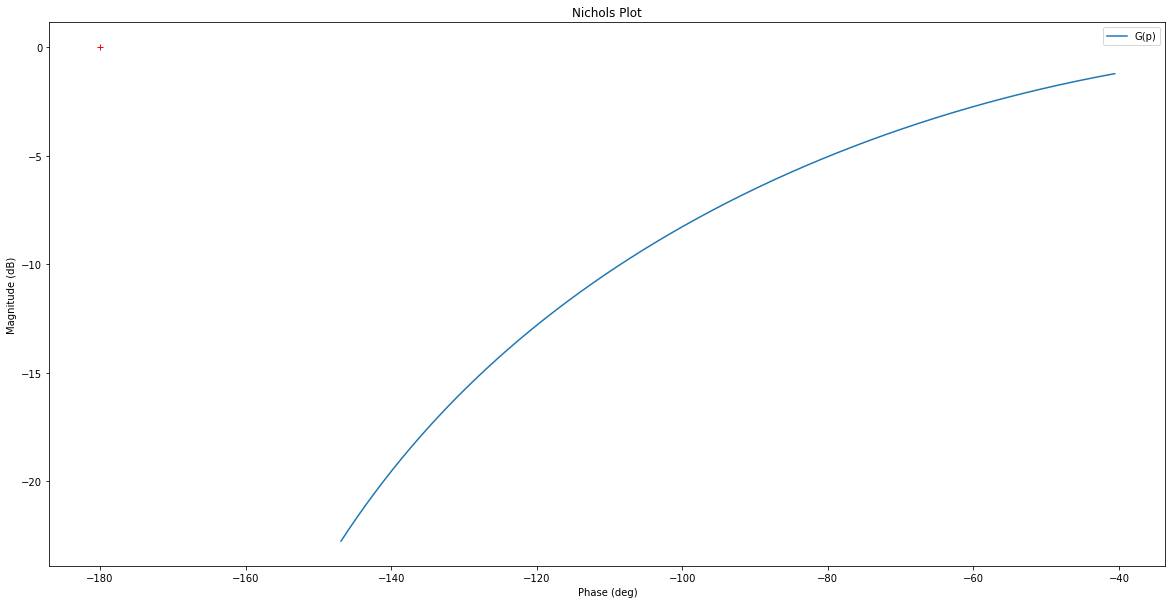

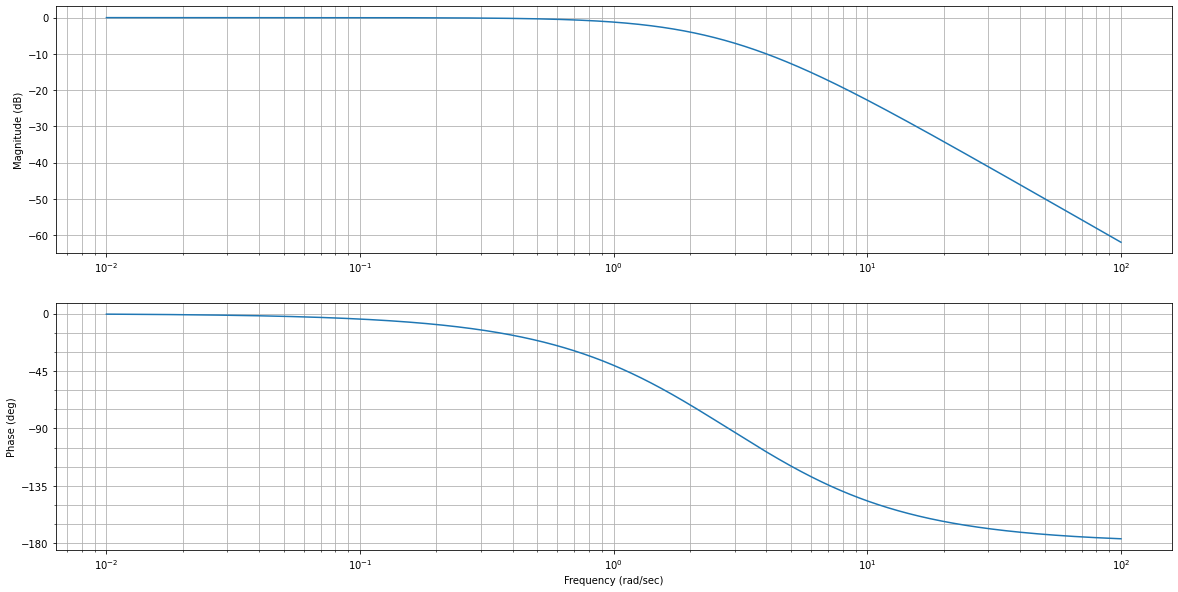

In [10]:
G1 = ml.tf(1, [0.5, 1])
G2 = ml.tf(1, [0.25, 1])
G = G1*G2

fig = plt.figure("Nichols", figsize=(20,10))
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")

fig = plt.figure("Bode", figsize=(20,10))
ax = fig.subplots()
mag, w = rlf.getValues(G, -135, printValue=True, NameOfFigure="Bode")

Kp = 1/mag  # Kp va à l'inverse de ce qu'on mesure
print("Kp =", Kp)

Visualisez l'effet sur la réponse indicielle:

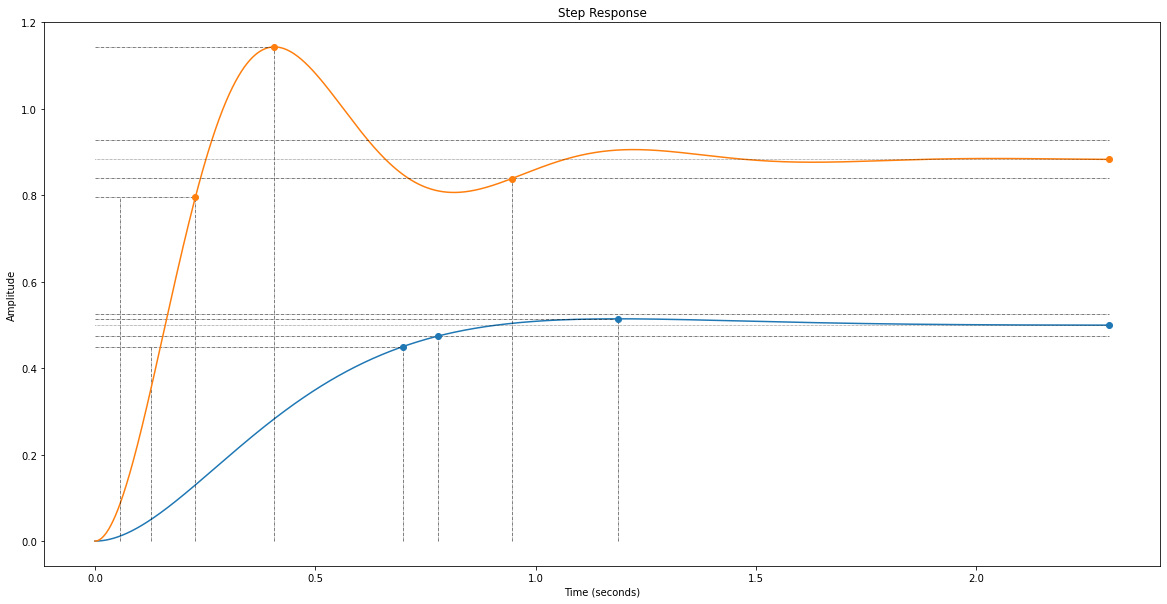

In [11]:
G_BF = ml.feedback(G, 1)
G_BF_Kp = ml.feedback(Kp*G, 1)

fig = plt.figure("Steps", figsize=(20,10))
rlf.stepWithInfo(G_BF, NameOfFigure="Steps")
rlf.stepWithInfo(G_BF_Kp, NameOfFigure="Steps");

### Limite de stabilité

Analysez le système asservi à retour unitaire dont la fonction de transfert de boucle ouverte est la
suivante (cf. p 7-11):

$$
G(p) = \frac{1}{(1+0,5p)*(1+4p)*(0.1p+1)}
$$

#### Nichols
Observez l’allure de $G_{BO}(p)$ sur le diagramme de Nichols et mesurez la marge de phase et la marge de gain ainsi que des pulsations correspondantes:
- $M_\Phi$ = ...
- $M_G$ = ...

:::{admonition} Astuce
:class: tip
Pour calculer la marge de gain et de phase d'un système, vous pouvez utiliser la fonction `margin` du package `control`.

**Exemple:**

    from control import matlab as ml
    G_BO = ml.tf(1, [1, 1])
    mg, mp, __, __ = ml.margin(G_BO)
:::

Marge de phase = inf° 
Marge de gain = 34.86235250429483 dB


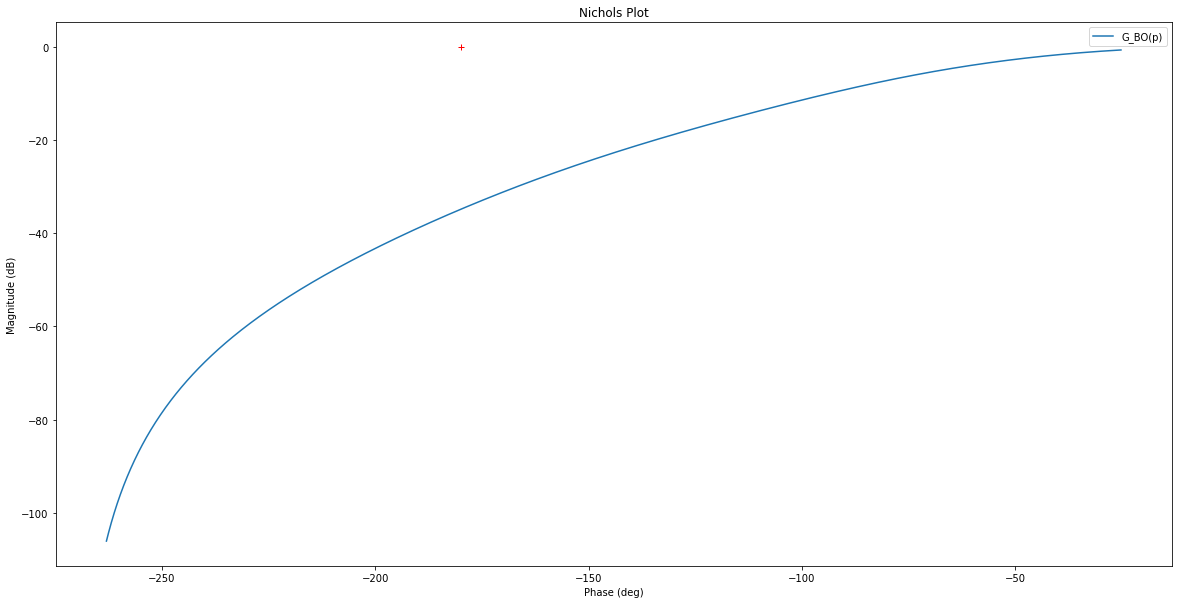

In [12]:
G1 = ml.tf(1, [0.5, 1])
G2 = ml.tf(1, [4, 1])
G3 = ml.tf(1, [0.1, 1])
G_BO = G1*G2*G3

fig = plt.figure("Nichols", figsize=(20,10))
rlf.nichols(G_BO, labels=['G_BO(p)'], NameOfFigure = "Nichols")

mg, mp, __, __ = ml.margin(G_BO)
mg = 20*np.log10(mg)  # Conversion de mg en dB
print("Marge de phase = {MP}° \nMarge de gain = {MG} dB".format(MP=mp, MG=mg))

Calculez la valeur critique de $K_p$ pour passer par le point « -1 » càd (0dB, -180°) : $K_p$ = ...

Kp = 55.349999999999994


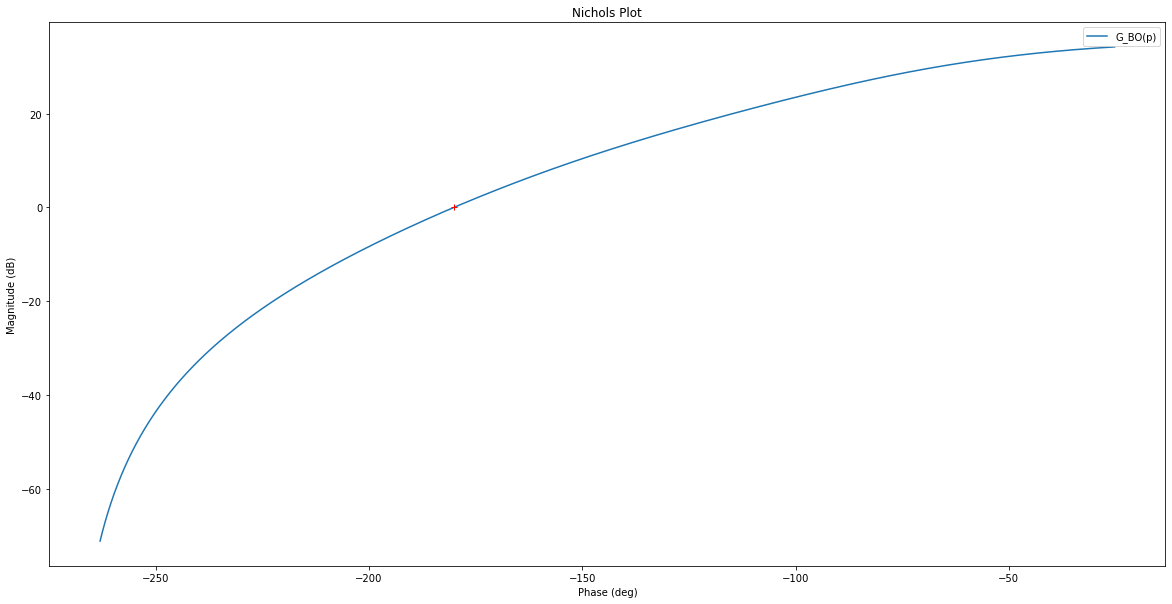

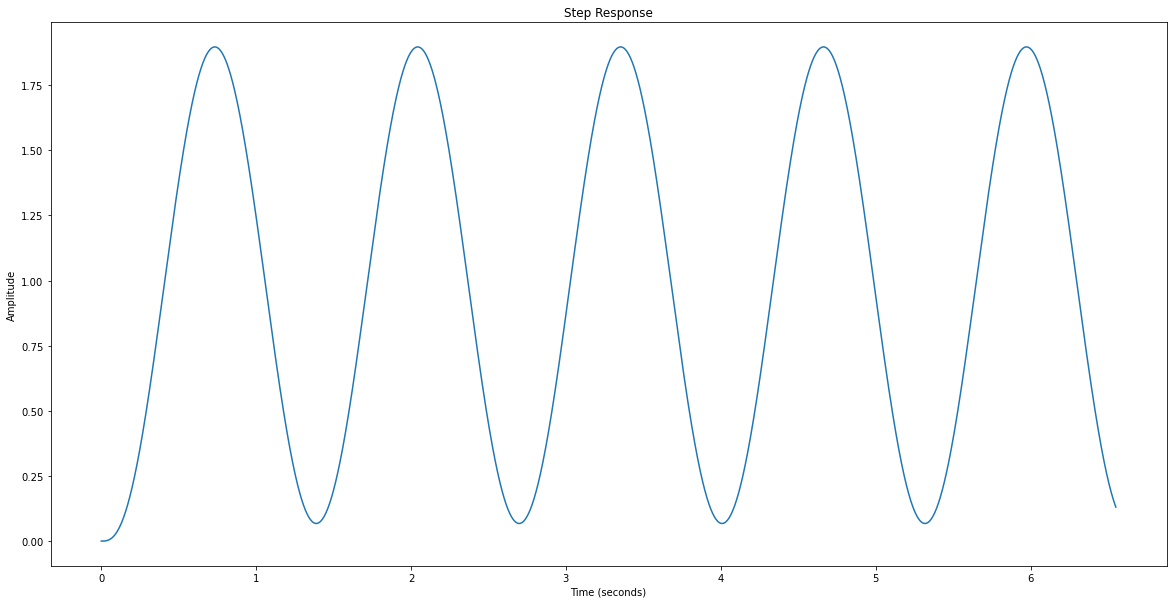

In [19]:
Kp = 10**(mg/20) # Kp ne doit pas être en dB => conversion
print("Kp =", Kp)

fig = plt.figure("Nichols", figsize=(20,10))
rlf.nichols(Kp*G_BO, labels=['G_BO(p)'], NameOfFigure = "Nichols")

G_BF= ml.feedback(Kp*G_BO)
fig = plt.figure("Steps", figsize=(20,10))
rlf.step_(G_BF, NameOfFigure="Steps");

#### Step

Avec $K_p = 54$, observez la réponse indicielle.

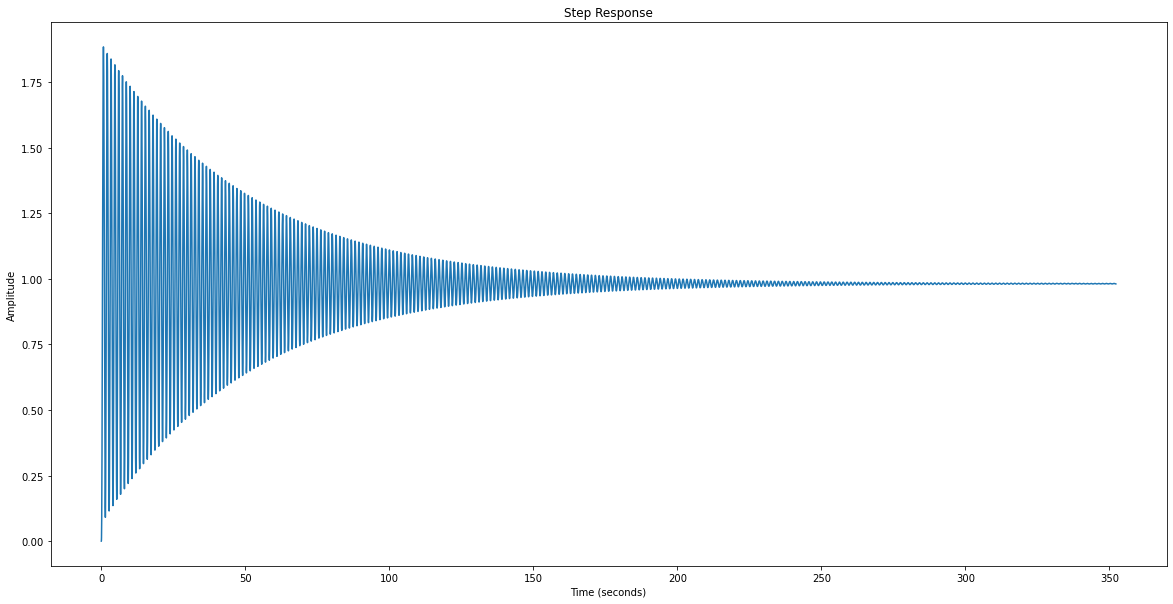

In [14]:
Kp = 54
G_BF= ml.feedback(Kp*G_BO)
fig = plt.figure("Steps", figsize=(20,10))
rlf.step_(G_BF, NameOfFigure="Steps");

Que se passe-t-il si on insère un correcteur proportionnel de gain $K_p = 56$ ?

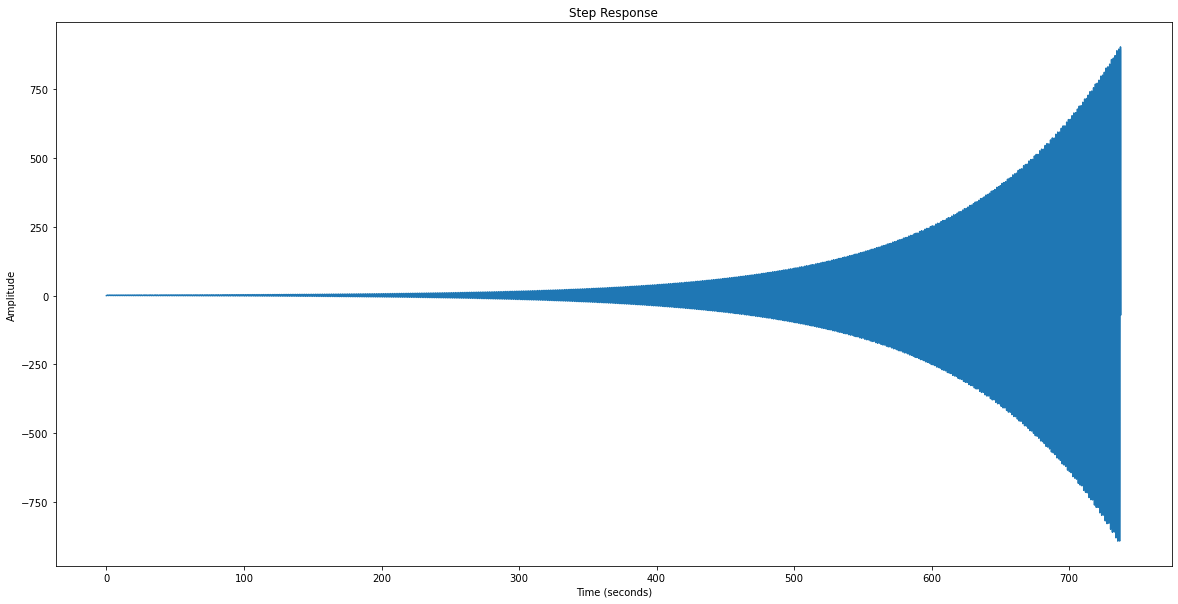

In [15]:
Kp = 56
G_BF= ml.feedback(Kp*G_BO)
fig = plt.figure("Steps", figsize=(20,10))
rlf.step_(G_BF, NameOfFigure="Steps");

Calculez $K_p$ pour obtenir une marge de phase de 45° :

:::{admonition} Astuce
:class: tip
Pour calculer la valeur du gain et/ou de la fréquence d'un système à une marge de phase donnée, vous pouvez utiliser la fonction `getValues` du package `ReguLabFct`.
:::

Gain à -135° = -20.136844108498554 dB
Fréquence à -135° = 1.8273687032470145 rad/sec
Kp = 10.158795207791778
Marge de phase = 45.016953712610814°


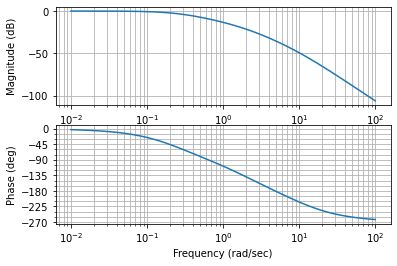

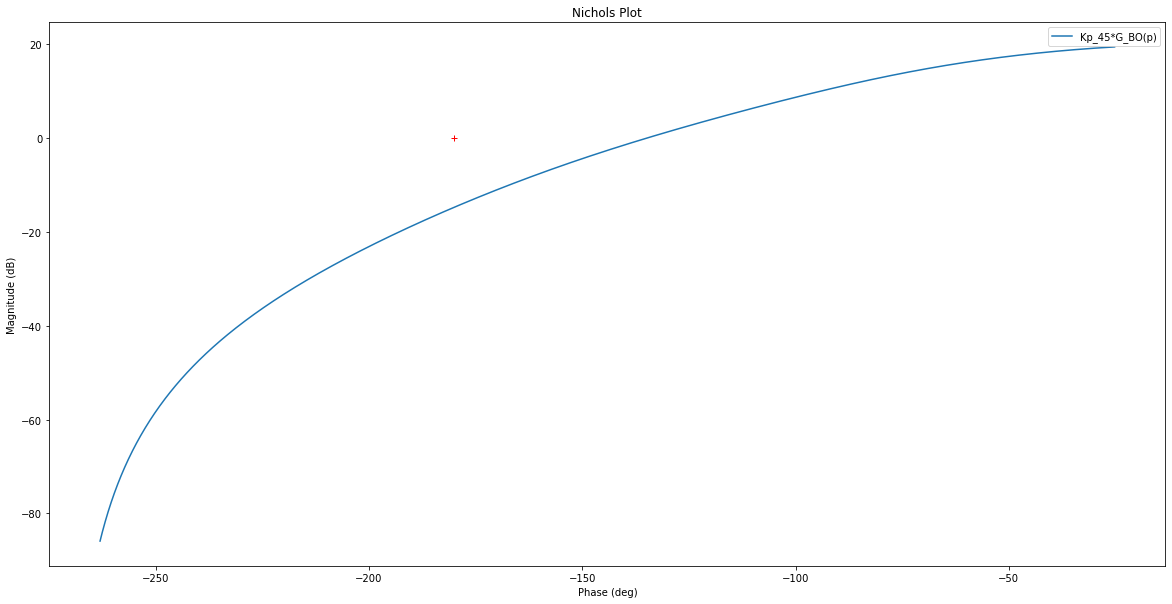

In [16]:
mag, w = rlf.getValues(G_BO, -135, NameOfFigure="Bode Gbo") # -135° car on souhaite regarder le gain du système en BO à 45° du point critique (-180°, 0dB)
Kp_45 = 1/mag  # Donne directement la valeur de l'amplitude => Pas besoin de la convertir à partir d'une valeur en dB + Kp va à l'inverse de ce qu'on mesure
print("Kp =", Kp_45)

fig = plt.figure("Nichols", figsize=(20,10))
rlf.nichols(Kp_45*G_BO, labels=['Kp_45*G_BO(p)'], NameOfFigure = "Nichols")
__, mp, __, __ = ml.margin(Kp_45*G_BO)
print("Marge de phase = {MP}°".format(MP=mp))

Calculez $K_p$ pour obtenir une marge de phase de 60° :

Gain à -120° = -16.200670408217633 dB
Fréquence à -120° = 1.3140499110790103 rad/sec
Kp = 6.457040648746092
Marge de phase = 59.97990291672397°


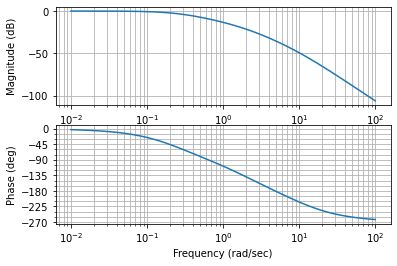

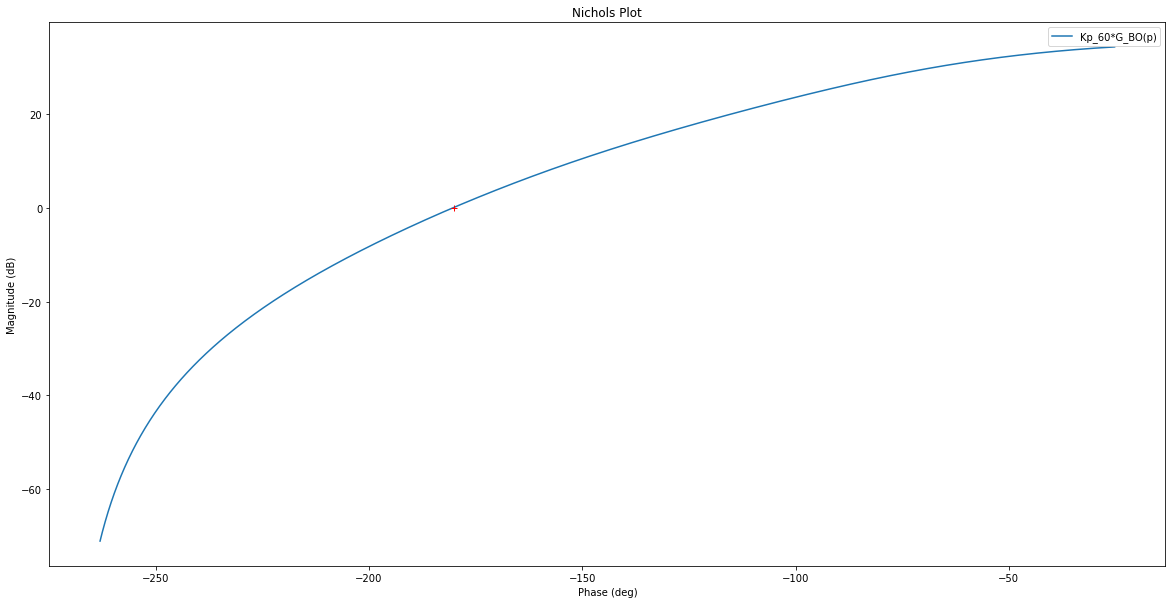

In [17]:
mag, w = rlf.getValues(G_BO, -120, NameOfFigure="Bode Gbo") # -120° car on souhaite regarder le gain du système en BO à 60° du point critique (-180°, 0dB)
Kp_60 = 1/mag  # Donne directement la valeur de l'amplitude => Pas besoin de la convertir à partir d'une valeur en dB + Kp va à l'inverse de ce qu'on mesure
print("Kp =", Kp_60)

fig = plt.figure("Nichols", figsize=(20,10))
rlf.nichols(Kp*G_BO, labels=['Kp_60*G_BO(p)'], NameOfFigure = "Nichols")
__, mp, __, __ = ml.margin(Kp_60*G_BO)
print("Marge de phase = {MP}°".format(MP=mp))

Et comparez les réponses indicielles respectives pour ces 2 marges typiques habituelles.

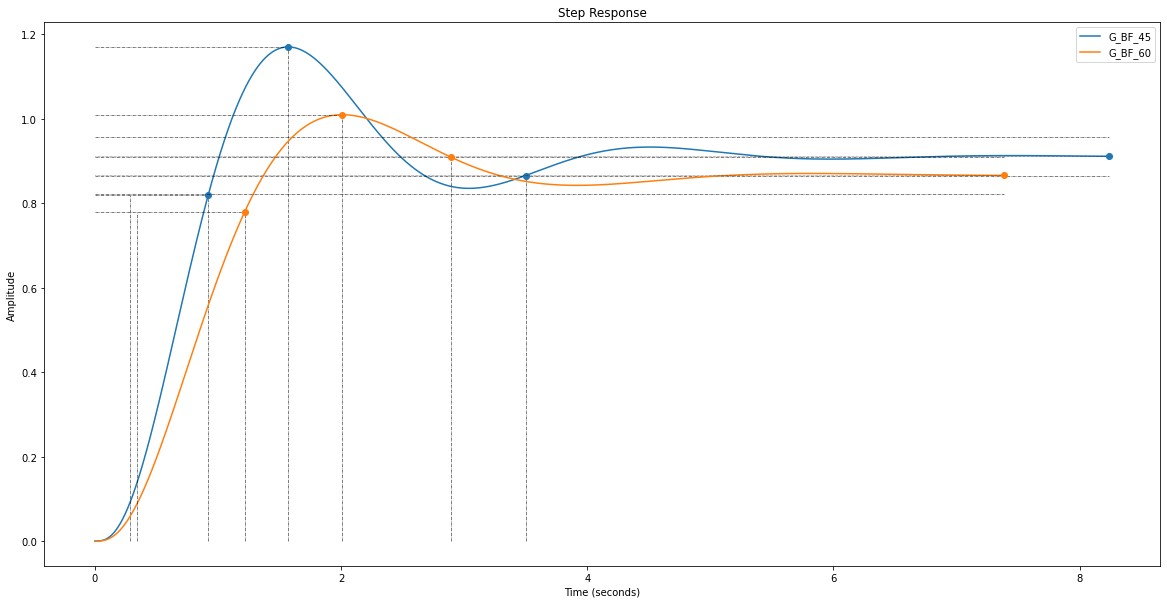

In [21]:
G_BF_45= ml.feedback(Kp_45*G_BO)
G_BF_60= ml.feedback(Kp_60*G_BO)
fig = plt.figure("Steps", figsize=(20,10))
rlf.stepWithInfo(G_BF_45, NameOfFigure="Steps", sysName='G_BF_45')
rlf.stepWithInfo(G_BF_60, NameOfFigure="Steps", sysName='G_BF_60');

(facultatif) Faites l’exercice 2 page 7-4 et visualisez les calculs par une résolution graphique

(facultatif) Faites aussi l’exercice 3.

(facultatif) **application 1 : régulation de vitesse**

Tracez le diagramme de Nichols qui permette de déterminer graphiquement la valeur max de A pour minimiser l’erreur tout en
garantissant une marge de phase de 45° ou de 60° et comparez avec la solution A=100.

(facultatif) **Régulation de position**

Tracez le diagramme de Nichols qui permette de déterminer graphiquement la valeur max de A pour minimiser l’erreur tout en
garantissant une marge de phase de 45°.

Comparez à la résolution temporelle …

Pour rappel, vous pouvez facilement obtenir les valeurs typiques d’une fonction d’ordre 2 grâce à la fonction `damp` du package `control`.

## Régulateur PI

### Construction du diagramme de Bode : effet pôle/zéro

Construction de la fonction de transfert d’un correcteur PI de la page 7-8 :

$$
C_{PI}(p)=K_p*\frac{1+\tau_I*p}{\tau_I*p}
$$

Prenez $K_p$ = 10 et $\tau_I$ = 1s

Tracez l'effet:
- de $K_p$
- du zéro: $f_1=1+p\tau_I$

  et observez l'influence d'un zéro de la fonction de transfert lorsque $\omega<<<\frac{1}{\tau_I}$ et  $\omega>>>\frac{1}{\tau_I}$ $\Rightarrow$ **synthèse sur l’effet d’un zéro à la page 4-16 !**

- du pôle: $f_2=\frac{1}{p\tau_I}$

  et observez l'influence d'un pôle à l'origine
  
$\Rightarrow$ Observez la construction de la fonction $C_{PI}$ par morceaux

$\Rightarrow$ Observez qu’en HF, le pôle compense le zéro

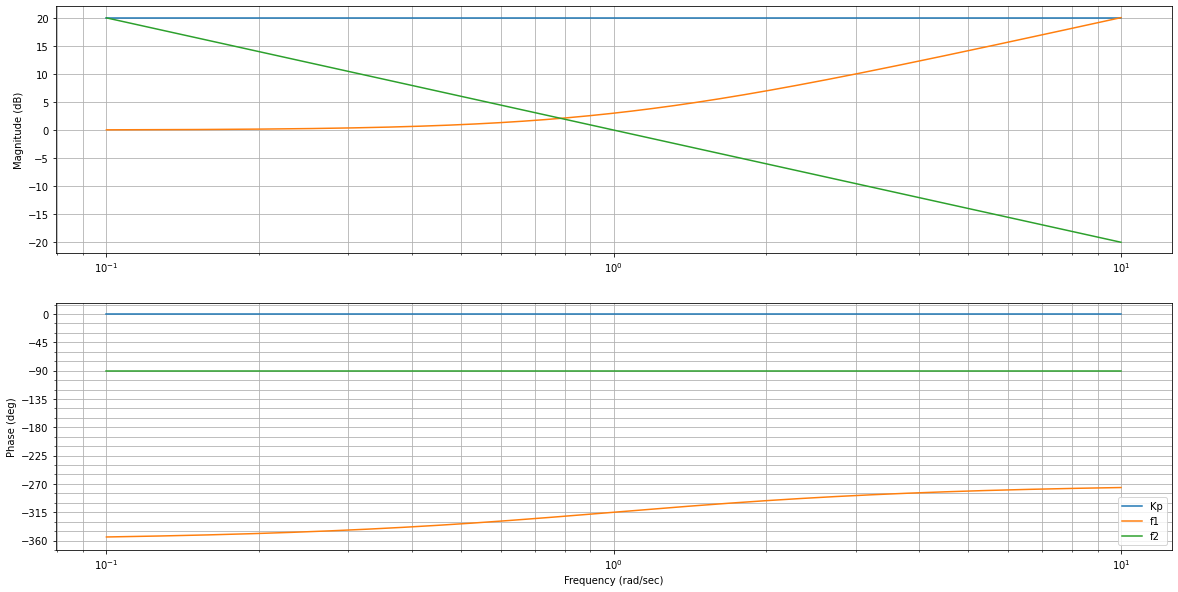

In [26]:
Kp = 10
tI = 1
f_Kp = ml.tf(Kp, 1)
f1 = ml.tf([tI, 1], [1])
f2 = ml.tf([1], [tI, 0])

fig = plt.figure("", figsize=(20,10))
ml.bode(f_Kp)
ml.bode(f1)
ml.bode(f2)
plt.legend(['Kp', 'f1', 'f2']);

(Facultatif) Construisez le diagramme de Bode de la fonction de transfert de la page 4-17 :

$$
G(p) = K_P*\frac{\tau_1p+1}{(\tau_2p+1)(\tau_3p+1)}
$$

Prenez $\tau_1$=1s, $\tau_2$=10000s, $\tau_3$ = 0.001s et $K_P$ = 2

- Tracez le diagramme de Bode de $f_2=\frac{1}{\tau_2p+1}$:

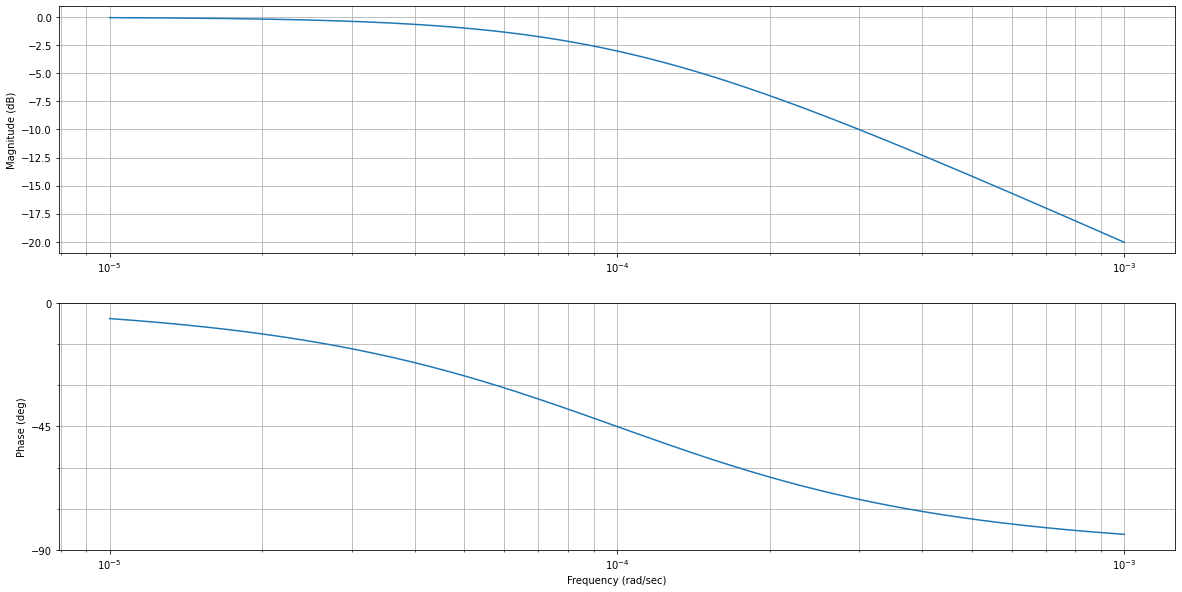

In [32]:
tI2 = 10000
f2 = ml.tf([1], [tI2, 1])
fig = plt.figure("", figsize=(20,10))
ml.bode(f2);

- Tracez le diagramme de Bode de $f_1=\tau_1p+1$:

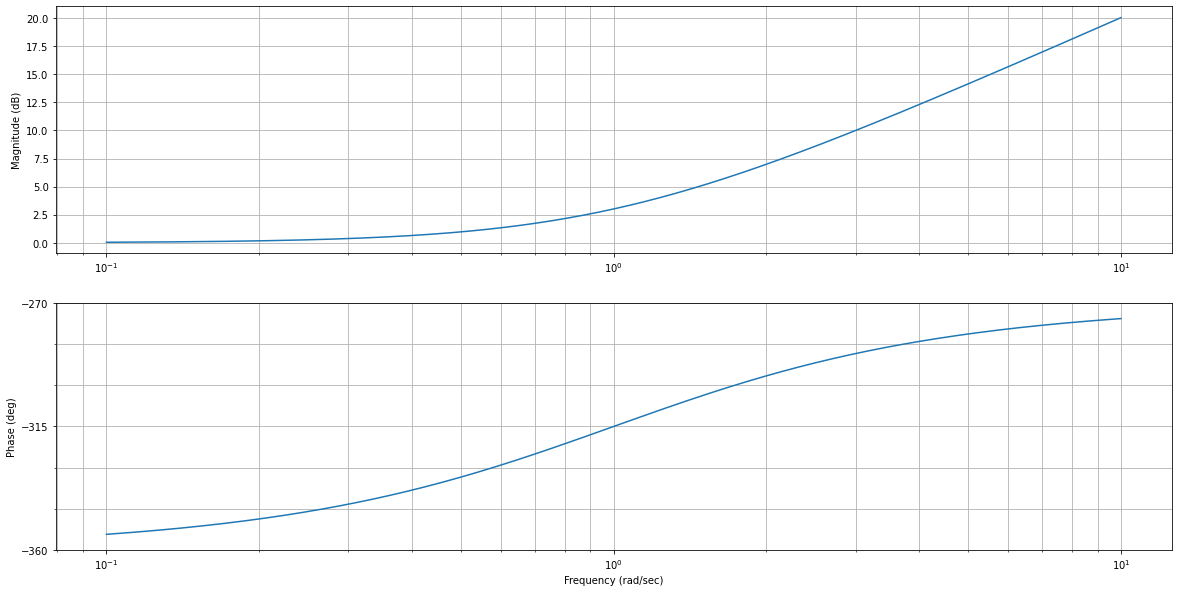

In [33]:
tI1 = 1
f1 = ml.tf([tI1, 1], [1])
fig = plt.figure("", figsize=(20,10))
ml.bode(f1);

- Tracez le diagramme de Bode de la fonction finale $H=f_1*f_2*f_3$ et observez l’addition graphique des différentes contributions :

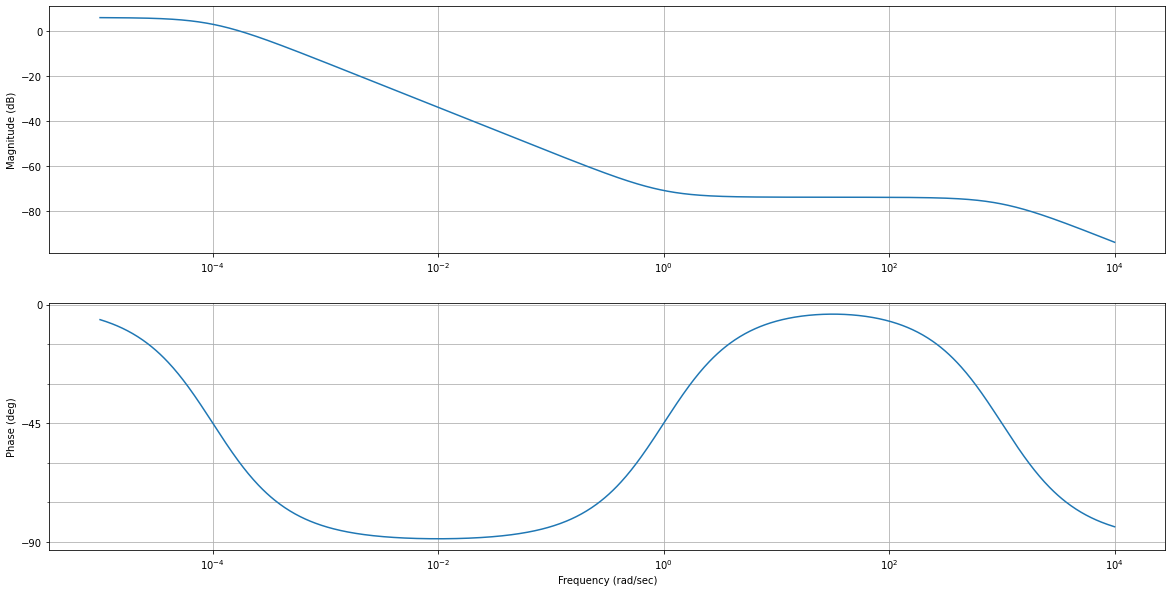

In [35]:
Kp = 2
tI3 = 0.001
f3 = ml.tf([1], [tI3, 1])

H = Kp*f1*f2*f3
fig = plt.figure("", figsize=(20,10))
ml.bode(H);

Effet si les pulsations caractéristiques sont plus proches : $\tau_1=1s$, $\tau_2=10s$ et $\tau_3=0,01s$:

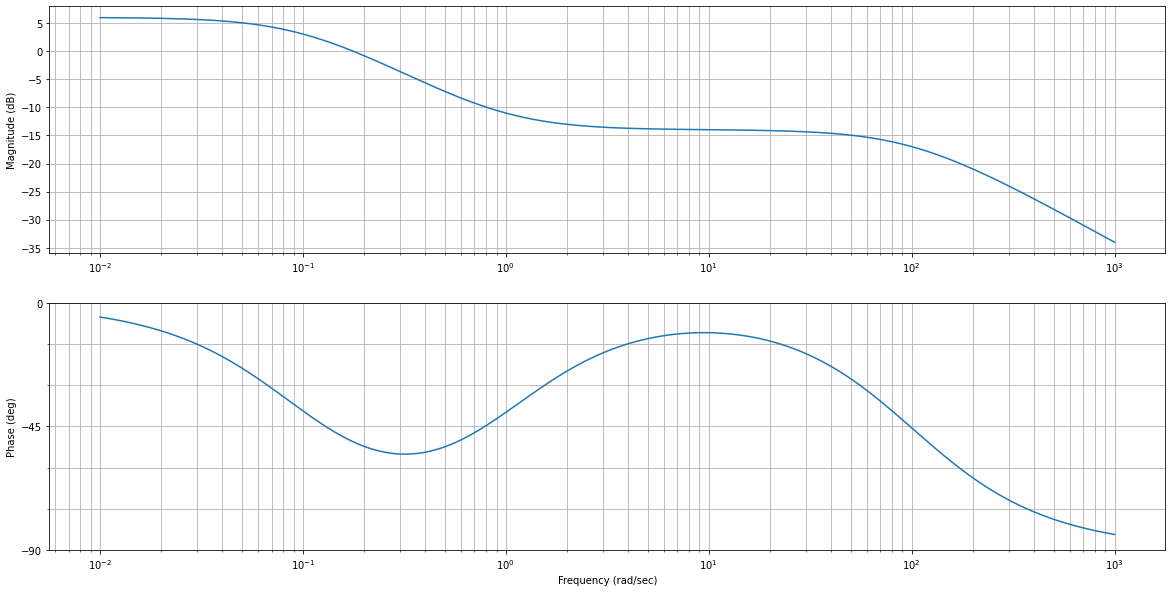

In [36]:
tI1 = 1
tI2 = 10
tI3 = 0.01

f1 = ml.tf([tI1, 1], [1])
f2 = ml.tf([1], [tI2, 1])
f3 = ml.tf([1], [tI3, 1])

H = Kp*f1*f2*f3
fig = plt.figure("", figsize=(20,10))
ml.bode(H);

Effet si les pulsations caractéristiques sont dispersées : $\tau_1=0.001s$, $\tau_2=10000s$ et $\tau_3=1s$ et $K_P=2$:

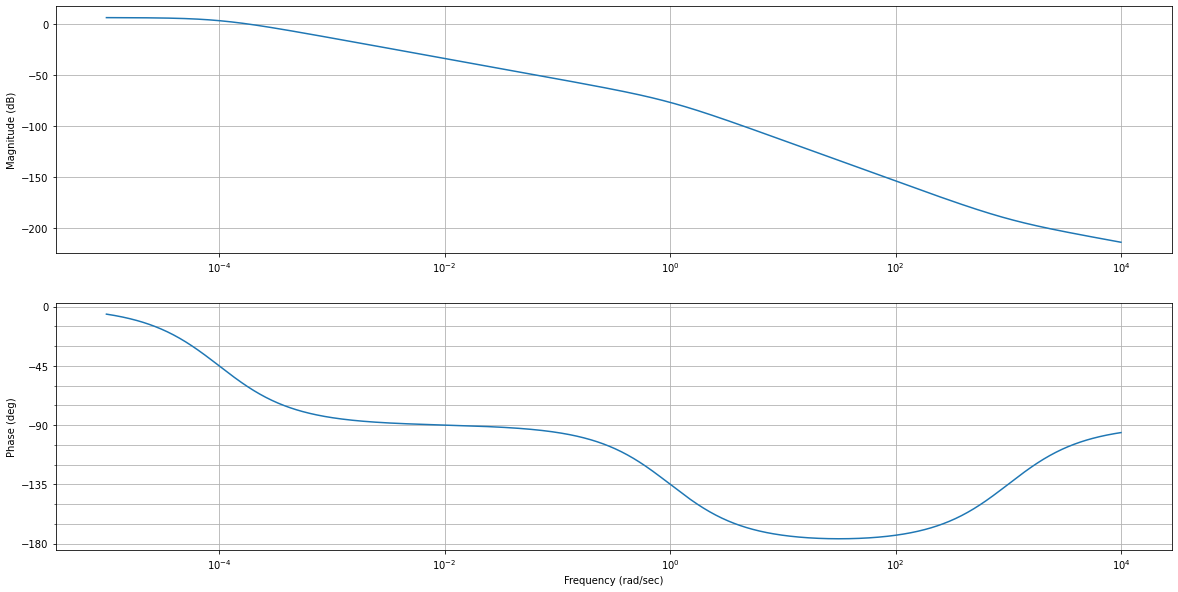

In [37]:
tI1 = 0.001
tI2 = 10000
tI3 = 1
Kp = 2

f1 = ml.tf([tI1, 1], [1])
f2 = ml.tf([1], [tI2, 1])
f3 = ml.tf([1], [tI3, 1])

H = Kp*f1*f2*f3
fig = plt.figure("", figsize=(20,10))
ml.bode(H);

### Exercice 4 page 7-9 (fait au cours)

Observez l’effet du pôle à l’origine : 
- sur le module :
- sur la phase :

Comment cela se traduit-il sur la réponse indicielle? :

### Système du $3^e$ ordre

Soit le système asservi à retour unitaire dont la fonction de boucle ouverte est :

$$
 G(p)=\frac{7500}{(p+4)(p+10)(p+500)}
$$

Ramenez le système à ses 2 pôles dominants. Vérifiez dans Nichols et sur la réponse indicielle.

On demande de déterminer le correcteur PI dont le but est d’annuler l’erreur en régime permanent tout en
assurant une réponse indicielle dont le dépassement est limité à 10% (tablez sur une marge de phase de 60°).
- Par la méthode du pôle dominant
- Par la méthode de placement fréquentiel

Tracez le diagramme de Nichols ainsi corrigé pour le système réel et pour le système ramené à 2 pôles dominants.

Tracez également les 2 réponses indicielles.

#### Méthode du pôle dominant

#### Méthode de placement fréquentiel

Observations: ...